In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bmi=pd.read_csv('bmi.csv')

In [3]:
bmi

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [4]:
bmi[bmi.duplicated()]

,Gender,Height,Weight,Index
187,Female,182,84,3
310,Male,171,147,5
327,Female,167,85,4
355,Male,174,90,3
365,Male,141,80,5
381,Male,191,62,1
382,Male,177,117,4
395,Female,164,71,3
400,Female,195,104,3
462,Male,179,56,1


In [5]:
bmi.drop_duplicates()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [6]:
bmi.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [7]:
bmi.nlargest(5,'Height')

,Gender,Height,Weight,Index
100,Male,199,156,4
160,Male,199,99,2
326,Female,199,92,2
85,Male,198,50,0
103,Female,198,145,4


In [8]:
bmi.nsmallest(5,'Height')

,Gender,Height,Weight,Index
17,Male,140,129,5
49,Male,140,152,5
144,Male,140,79,5
147,Female,140,146,5
151,Male,140,52,3


<AxesSubplot:>

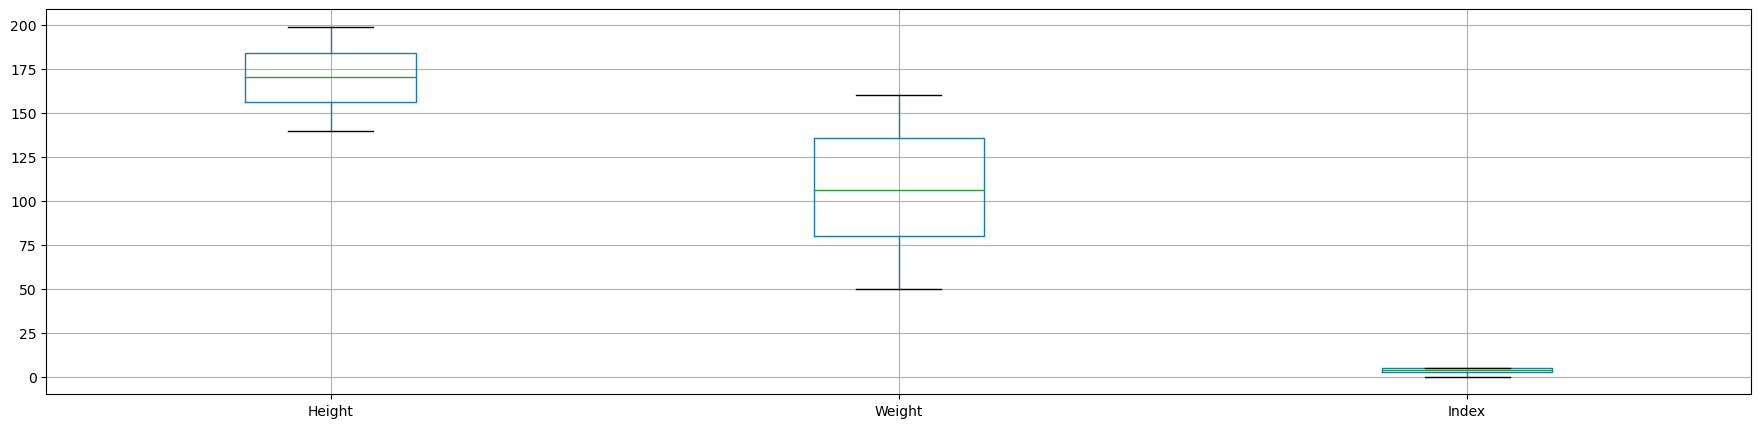

In [9]:
plt.figure(figsize=(22,5))
bmi.boxplot()

<AxesSubplot:>

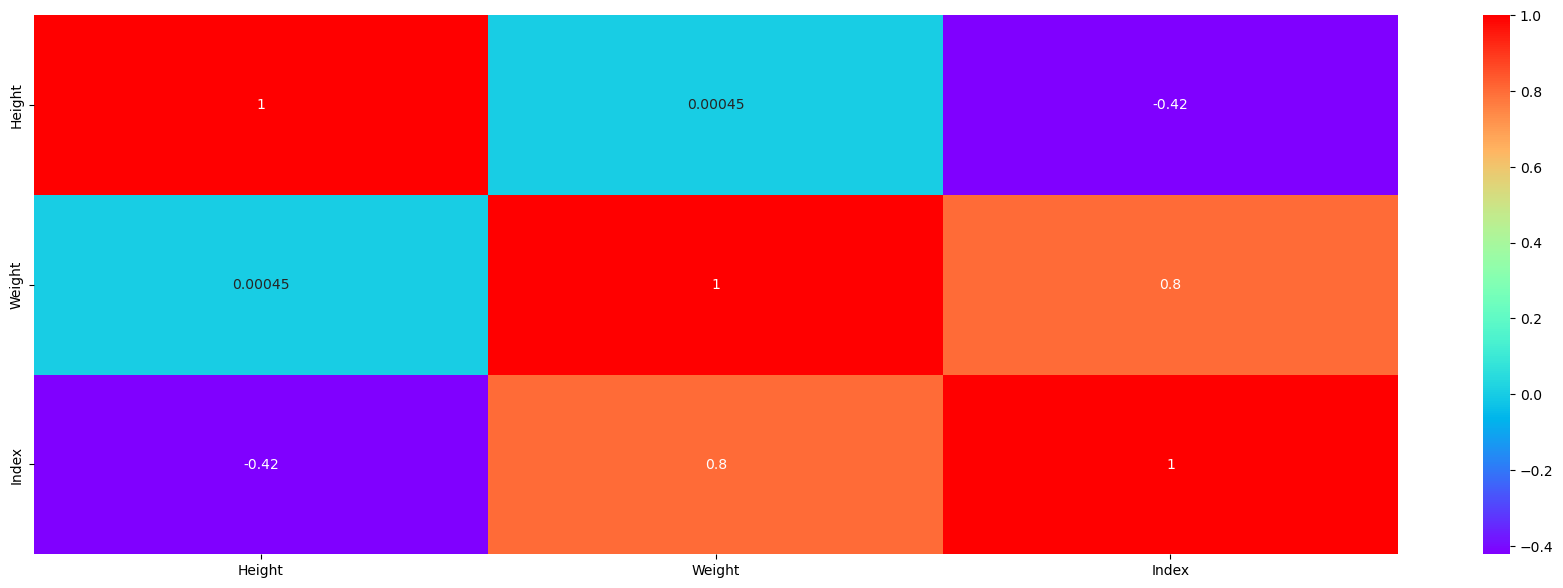

In [10]:
plt.figure(figsize=(22,7))
sns.heatmap(bmi.corr(),cmap='rainbow',annot=True)

<AxesSubplot:xlabel='Gender', ylabel='Height'>

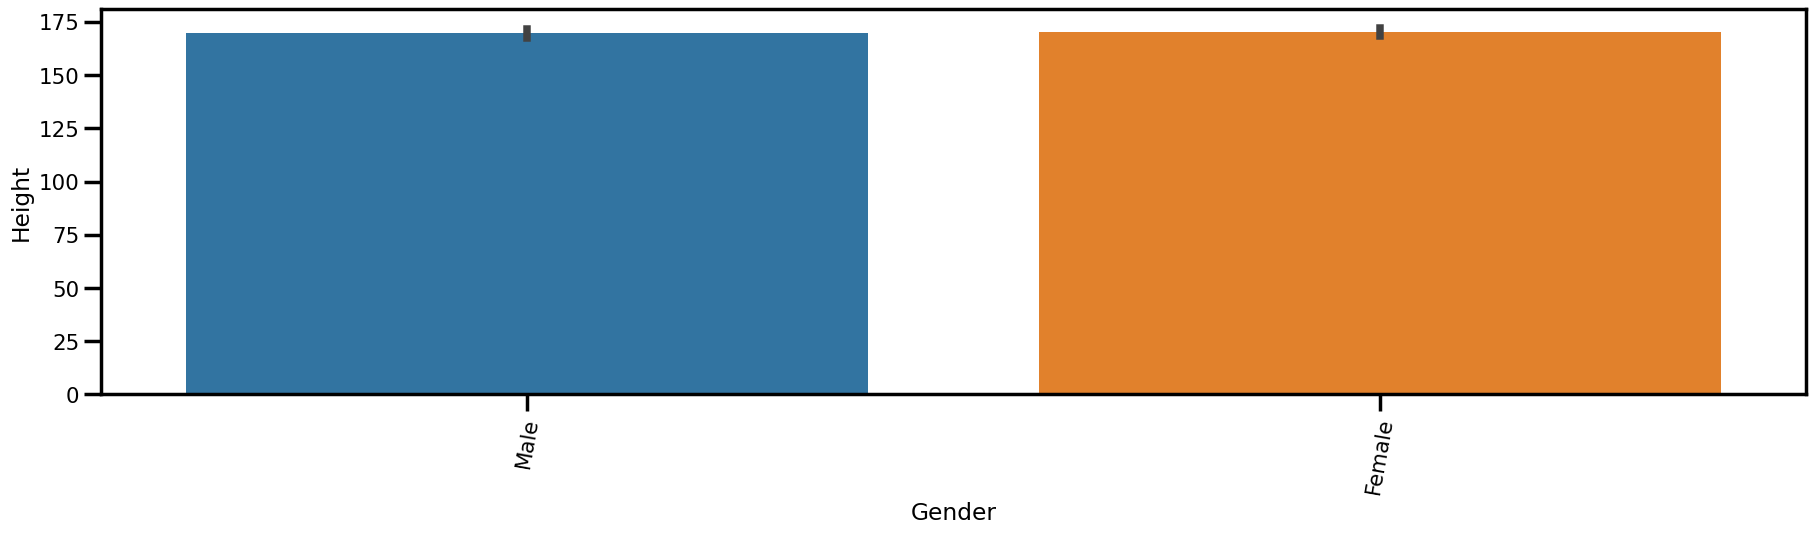

In [11]:
plt.figure(figsize=(22,5))
sns.set_context('poster',font_scale=(0.7))
plt.xticks(rotation=80)
sns.barplot(x='Gender',y='Height',data=bmi)

<AxesSubplot:xlabel='Gender', ylabel='Weight'>

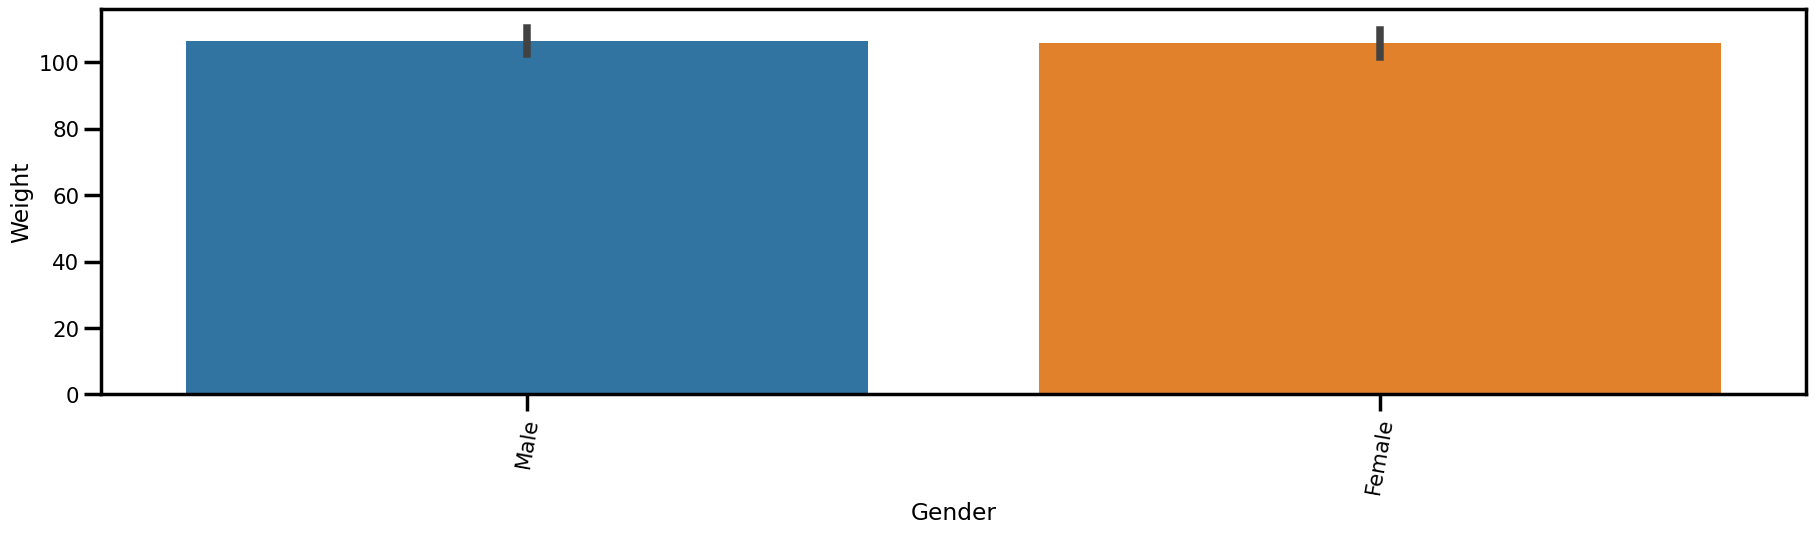

In [12]:
plt.figure(figsize=(22,5))
sns.set_context('poster',font_scale=(0.7))
plt.xticks(rotation=80)
sns.barplot(x='Gender',y='Weight',data=bmi)

<AxesSubplot:xlabel='Gender', ylabel='Index'>

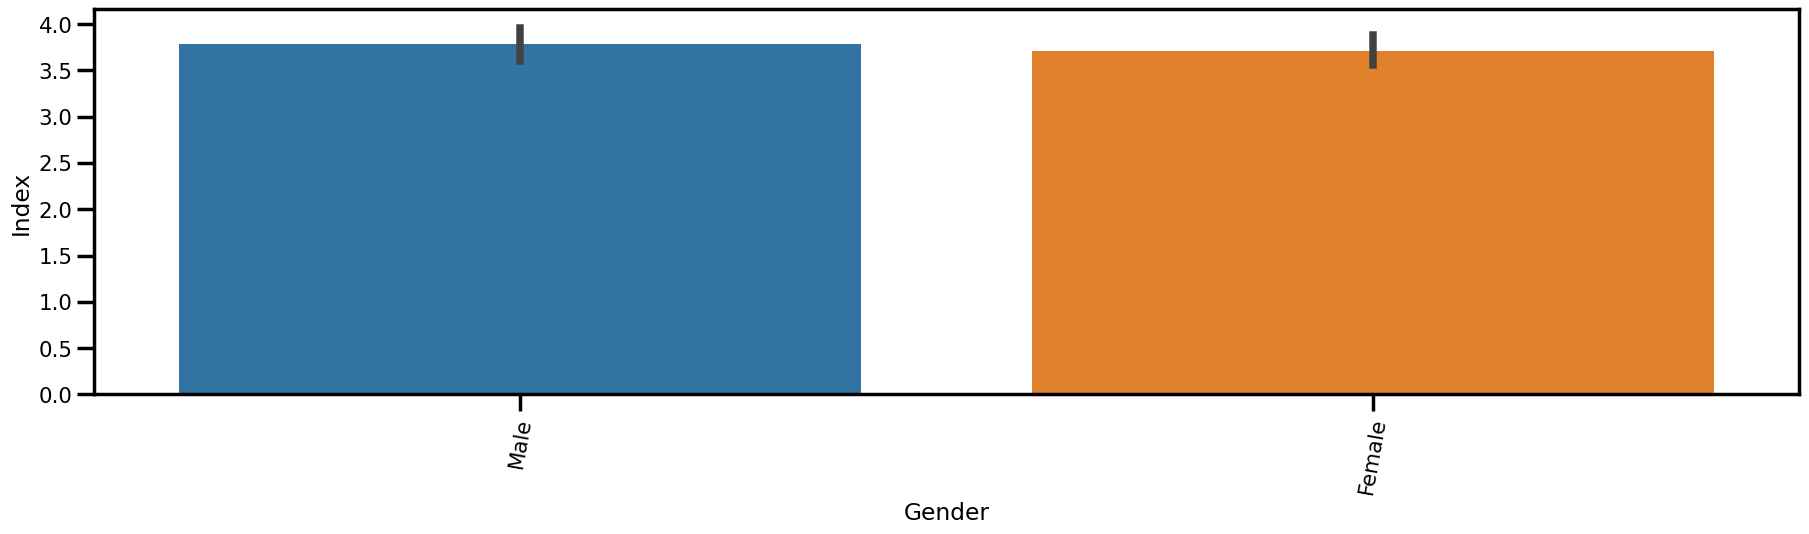

In [13]:
plt.figure(figsize=(22,5))
sns.set_context('poster',font_scale=(0.7))
plt.xticks(rotation=80)
sns.barplot(x='Gender',y='Index',data=bmi)

# logistic Regression

In [14]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [15]:
data=['Gender']

In [16]:
for x in data:
    bmi[x]=enc.fit_transform(bmi[x])

In [17]:
y=bmi.Gender

In [18]:
y

0      1
1      1
2      0
3      0
4      1
      ..
495    0
496    0
497    0
498    1
499    1
Name: Gender, Length: 500, dtype: int32

In [19]:
x=bmi.iloc[:,[0,1,2,3]]

In [20]:
x

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3
...,...,...,...,...
495,0,150,153,5
496,0,184,121,4
497,0,141,136,5
498,1,150,95,5


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=90)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model_logr=LogisticRegression()

In [25]:
model_logr.fit(x_train,y_train)

LogisticRegression()

In [26]:
predict_logr=model_logr.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [28]:
accuracy_score(predict_logr,y_test)

1.0

In [29]:
confusion_matrix(predict_logr,y_test)

array([[207,   0],
       [  0, 193]], dtype=int64)

In [30]:
print(classification_report(predict_logr,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      1.00      1.00       193

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



# KNN classifier


In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
model_knc=KNeighborsClassifier(n_neighbors=85)

In [33]:
model_knc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=85)

In [34]:
predict_knc=model_knc.predict(x_test)

C:\Users\sriva\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [35]:
accuracy_score(y_test,predict_knc)

0.485

In [36]:
confusion_matrix(y_test,predict_knc)

array([[  2, 205],
       [  1, 192]], dtype=int64)

In [37]:
print(classification_report(y_test,predict_knc))

              precision    recall  f1-score   support

           0       0.67      0.01      0.02       207
           1       0.48      0.99      0.65       193

    accuracy                           0.48       400
   macro avg       0.58      0.50      0.33       400
weighted avg       0.58      0.48      0.32       400



# Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model_rfc=RandomForestClassifier()

In [40]:
model_rfc.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
predict_rfc=model_rfc.predict(x_test)

In [42]:
accuracy_score(y_test,predict_rfc)

1.0

In [43]:
confusion_matrix(y_test,predict_rfc)

array([[207,   0],
       [  0, 193]], dtype=int64)

In [44]:
print(classification_report(y_test,predict_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      1.00      1.00       193

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



# DecisionTreeClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
model_dtr=DecisionTreeClassifier()

In [47]:
model_dtr.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
predict_dtr=model_dtr.predict(x_test)

In [49]:
accuracy_score(y_test,predict_dtr)

1.0

In [50]:
confusion_matrix(y_test,predict_dtr)

array([[207,   0],
       [  0, 193]], dtype=int64)

In [51]:
print(classification_report(y_test,predict_dtr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      1.00      1.00       193

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

